In [135]:
# import modules
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt

# Import DataFrames

In [136]:
# get raw data
df = pd.read_csv('dataframes/pos_df.csv')
df.head()

,Sample Name,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
0,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),167.0000,143.0000,125.0000,132.0000,171.6091,182.9007,120.0000,120.0000,281.3523,...,130.0000,142.0000,68.0529,46.4729,88.0000,91.0000,229.5233,278.1255,206.0000,182.0000
1,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),53.2158,52.8015,47.4908,76.2783,27.6563,23.0569,9.0712,24.0712,0.0000,...,0.0000,2.1176,47.2560,62.7063,11.1856,0.0000,10.8768,6.0672,0.0000,34.4747
2,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),167.8122,131.3388,220.0689,128.3439,342.9760,331.4596,268.9979,289.4925,295.0869,...,290.0353,223.3067,187.9922,219.2679,231.3212,219.2373,329.9421,313.2847,251.0406,226.8066
3,Hex2Cer 26:2;2 (LCB 18:0;2-H2O),54.0000,47.0000,39.0000,44.0000,74.0000,64.0000,84.5341,88.7361,70.0000,...,44.0000,37.0000,48.6404,51.9843,38.9995,52.0000,62.0000,57.0000,51.0000,40.0000
4,Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),391.2240,326.4641,444.7720,385.3202,175.0126,296.5953,238.6997,214.9442,215.1018,...,309.7805,272.9937,373.2111,292.2522,348.9607,348.3176,304.3199,271.4133,303.6544,253.3654


In [137]:
# get lipid metadata
df_meta = pd.read_csv('dataframes/pos_lipids_df_meta.csv')
df_meta.sample(5)

,Sample Name,Head Group,Acyl Chain Length,Unsaturation
1004,PE 38:7 (-PE),PE,38,7
517,GD2 36:0;2 (LCB 18:0;2-H2O),GD2,36,0
4910,MADAG 54:10+NH4 (-FA 20:2 (NH4)),MADAG,54,10
2428,PC 30:2 (LPC),PC,30,2
3003,"SGalCer 40:2;2 (LCB 18:1;2-2H2O,LCB 18:0;3-3H2O)",SGalCer,40,2


In [138]:
# get experiment metadata
df_exps = pd.read_csv('dataframes/pos_df_exps.csv')
df_exps.sample(5)

,Exp,Mutation
41,WT_B.1,WT
28,RAJU-Blank,RAJU
30,SPTLC_A,SPTLC
14,CERS2_mg-B,CERS2_mg
3,CAS9-B.1,CAS9


# Principal Components Analysis (Transposed)

In [139]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [140]:
# drop the blank columns and transpose dataframe
samples = df["Sample Name"]
df_dropped = df[['CAS9-A', 'CAS9-A.1', 'CAS9-B', 'CAS9-B.1', 'CAV_A',
       'CAV_A.1', 'CAV_B', 'CAV_B.1', 'CAVIN_A', 'CAVIN_A.1', 'CAVIN_B',
       'CAVIN_B.1', 'CERS2_mg-A', 'CERS2_mg-A.1', 'CERS2_mg-B', 'CERS2_mg-B.1',
       'CERS2-1g_A', 'CERS2-1g_A.1', 'CERS2-1g_B', 'CERS2-1g_B.1', 'CERS5-A',
       'CERS5-A.1', 'CERS5-B', 'CERS5-B.1', 'Flot2-A', 'Flot2-A.1', 'Flot2-B',
       'Flot2-B.1', 'SPTLC_A', 'SPTLC_A.1',
       'SPTLC_B', 'SPTLC_B.1', 'UGCG-A', 'UGCG-A.1', 'UGCG-B', 'UGCG-B.1',
       'WT_A', 'WT_A.1', 'WT_B', 'WT_B.1']]

df_dropped = df_dropped.T
exps = df_dropped.index

x = df_dropped.values

# for each column, standardize the values
x = StandardScaler().fit_transform(x)

# check random column for standardization (mean=0, standard deviation=1)
x.shape, np.mean(x[:,20]), np.std(x[:,20])

((40, 6278), np.float64(4.4408920985006264e-17), np.float64(1.0))

In [141]:
# create dataframe with standardized values
df_standardized = pd.DataFrame(x, columns=samples)
df_standardized = df_standardized.set_index(exps)
df_standardized.head(10)

Sample Name,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-H2O),Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),Hex2Cer 26:0;2 (LCB 18:0;2-H2O),Hex2Cer 26:4;3 (LCB 18:0;2-H2O),"Hex2Cer 26:4;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)","Hex2Cer 26:3;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)","Hex2Cer 26:3;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)",...,DAG 35:0+NH4 (-FA 17:0 (NH4)),DAG 38:4+NH4 (-FA 18:1 (NH4)),DAG 38:4+NH4 (-FA 20:3 (NH4)),DAG 38:4+NH4 (-FA 20:4 (NH4)),MADAG 38:2+NH4 (-FA 13:0 (NH4)),DAG 38:2+NH4 (-FA 16:1 (NH4)),MADAG 38:2+NH4 (-FA 16:2 (NH4)),DAG 38:2+NH4 (-FA 18:0 (NH4)),DAG 38:2+NH4 (-FA 18:1 (NH4)),MADAG 38:2+NH4 (-FA 18:2 (NH4))
CAS9-A,-0.119632,1.767019,-1.638565,0.206113,1.929826,0.169306,2.227004,0.471287,0.400821,-0.494894,...,-0.482176,-0.398903,-0.370975,-0.350245,-0.484760,-0.600253,-0.318859,-0.618937,-0.593602,-0.620205
CAS9-A.1,-0.553561,1.746037,-2.330926,-0.207008,1.015202,0.228176,-0.659004,-0.757276,-0.763288,-0.494894,...,-0.482176,-0.398903,-0.370975,-0.350245,-0.484760,-0.600253,-0.318859,-0.618937,-0.593602,-0.620205
CAS9-B,-0.879008,1.477073,-0.646596,-0.679147,2.686101,2.670966,-0.659004,0.207133,1.172339,-0.494894,...,-0.482176,-0.398903,-0.370975,-0.350245,-0.484760,-0.600253,-0.318859,-0.618937,-0.593602,-0.620205
CAS9-B.1,-0.752445,2.935033,-2.387777,-0.384060,1.846445,0.127014,2.050161,-0.757276,1.298701,2.624122,...,-0.482176,-0.398903,-0.370975,-0.350245,-0.484760,-0.600253,-0.318859,-0.618937,-0.593602,-0.620205
CAV_A,-0.036297,0.472543,1.686503,1.386459,-1.123793,0.761665,-0.659004,-0.757276,1.040952,-0.494894,...,3.019255,2.518582,2.754141,3.625649,1.846327,0.151630,2.785081,-0.100456,0.801032,1.933684
CAV_A.1,0.167859,0.239604,1.467892,0.796286,0.593356,0.310385,-0.659004,-0.757276,0.783203,1.409335,...,2.669112,3.887279,2.924216,-0.350245,-0.484760,0.452383,1.882117,0.634059,0.964328,2.275976
CAV_B,-0.969410,-0.468710,0.282205,2.008153,-0.224321,-0.329849,2.049686,-0.757276,-0.763288,-0.494894,...,1.531147,2.266454,2.860438,2.964777,1.740368,2.106525,-0.318859,0.979713,0.650977,1.529318
CAV_B.1,-0.969410,0.290974,0.671246,2.256143,-0.559827,1.425733,0.806763,-0.757276,-0.763288,-0.494894,...,1.239361,1.582106,2.924216,3.316531,1.263555,2.557654,-0.318859,0.893300,0.425893,1.430000
CAVIN_A,1.947901,-0.928126,0.777443,1.150389,-0.557601,0.745717,-0.659004,-0.757276,1.040952,0.929145,...,-0.482176,-0.398903,-0.370975,-0.350245,-0.484760,-0.600253,-0.318859,-0.618937,-0.593602,-0.620205
CAVIN_A.1,0.193994,-0.226649,-0.553325,0.029061,-0.563991,-0.949952,0.258598,1.358562,1.291696,-0.494894,...,-0.482176,-0.398903,-0.370975,-0.350245,1.210576,1.003763,2.446470,1.238954,-0.593602,1.779386


In [142]:
# do PCA
from sklearn.decomposition import PCA
pca_lipids = PCA(n_components=10)
principal_components = pca_lipids.fit_transform(x)

In [144]:
# create df with pca values

# create list of columns
pcs = []
for i in range(1,41):
    pcs.append('principal component ' + str(i))
# print(pcs)

# create df
df_pca = pd.DataFrame(principal_components, columns=pcs)
df_pca["Exp"] = exps
df_pca = df_pca.merge(df_exps, on='Exp')
df_pca

ValueError: Shape of passed values is (40, 10), indices imply (40, 40)

Explained variation per principal component: [1.19882957e-01 8.35215326e-02 7.44379593e-02 5.97608866e-02
 5.28228551e-02 4.18974587e-02 3.51673438e-02 2.92079774e-02
 2.73809493e-02 2.68395531e-02 2.42171390e-02 2.32787460e-02
 2.29091643e-02 2.20540177e-02 2.14682948e-02 2.06351827e-02
 1.98721748e-02 1.92201470e-02 1.91041768e-02 1.83841600e-02
 1.69988954e-02 1.63539033e-02 1.57549682e-02 1.49955057e-02
 1.45266102e-02 1.40907391e-02 1.38800869e-02 1.33797624e-02
 1.32105121e-02 1.27596408e-02 1.17650802e-02 1.15654382e-02
 1.14813338e-02 1.11751308e-02 1.08460987e-02 1.05683857e-02
 9.70463937e-03 8.22719547e-03 6.65339704e-03 5.29775397e-31]


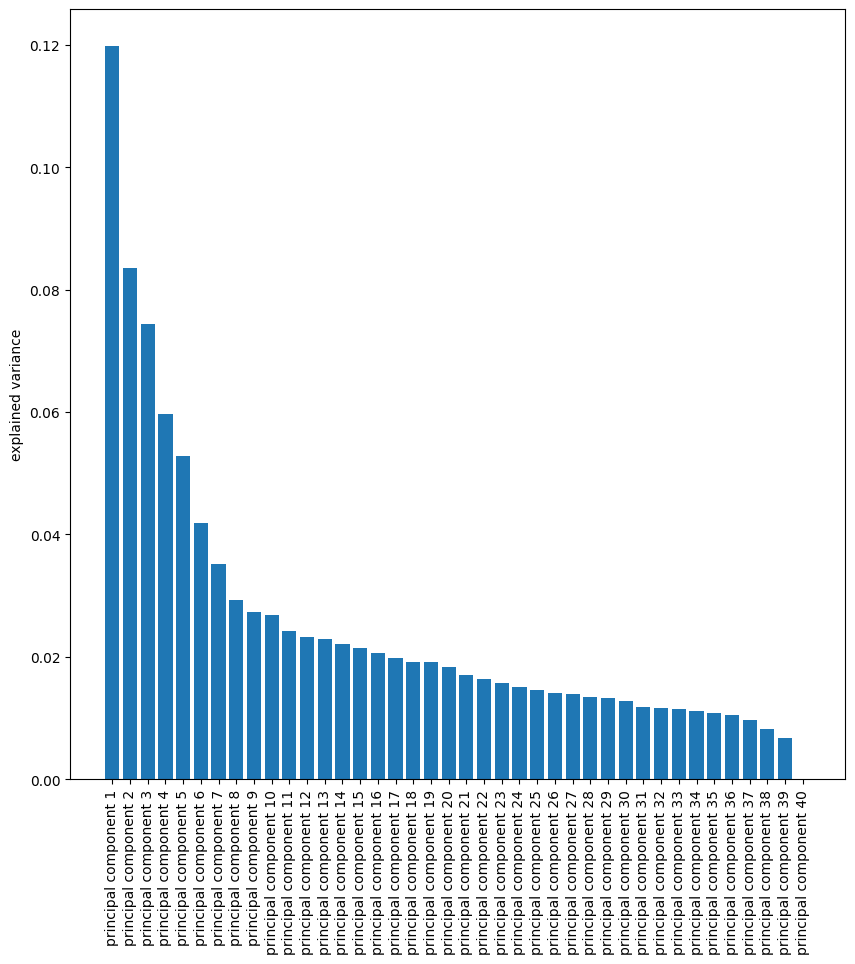

np.float64(1.0)

In [110]:
# find explained variance
explained_variance = pca_lipids.explained_variance_ratio_
print('Explained variation per principal component: {}'.format(explained_variance))

plt.figure(figsize=(10,10))
plt.bar(
    x=pcs,
    height=explained_variance
)
plt.ylabel('explained variance')
plt.xticks(rotation=90)
plt.show()

explained_variance.sum()

# Graph PCA (Transposed)

In [111]:
import altair as alt

In [112]:
# chart principal components
click = alt.selection_point(fields=['Mutation'])

pca= alt.Chart(df_pca).mark_point().encode(
    x='principal component 1:Q',
    y='principal component 2:Q',
    color=alt.condition(click, 'Mutation:N', alt.value('lightgray')),
    tooltip=['Exp', 'Mutation']
).properties(
    width=400,
    height=500,
    title='Principal Components Analysis'
).add_params(
    click
)

pca

alt.Chart(...)

# Confidence Ellipse

In [113]:
# add confidence ellipse
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

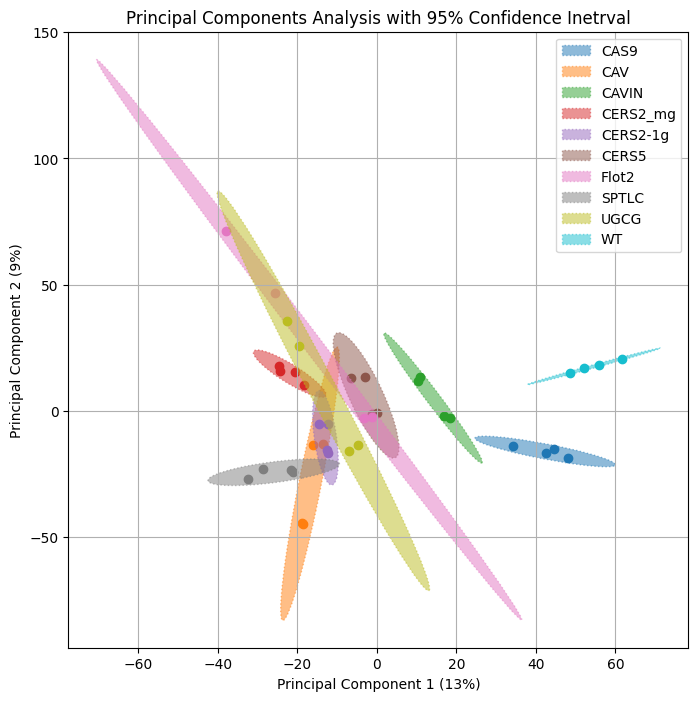

In [114]:
i = 0
fig, ax_nstd = plt.subplots(figsize=(8,8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for protein in df_pca['Mutation'].unique():
    x = df_pca[df_pca['Mutation'] == protein]['principal component 1']
    y = df_pca[df_pca['Mutation'] == protein]['principal component 2']
    
    ax_nstd.scatter(x, y, color=colors[i])
    confidence_ellipse(x, y, ax_nstd, n_std=3,
                   label=protein, alpha=0.5, facecolor=colors[i], edgecolor=colors[i], linestyle=':')
    i += 1


ax_nstd.grid()
ax_nstd.legend()
ax_nstd.set_title('Principal Components Analysis with 95% Confidence Inetrval')
ax_nstd.set_xlabel('Principal Component 1 (13%)')
ax_nstd.set_ylabel('Principal Component 2 (9%)')
plt.show()
ax_nstd.figure.savefig('graphs/pos_mode_whole_dataset/pca_confidence_ellipse.jpg', dpi=300)

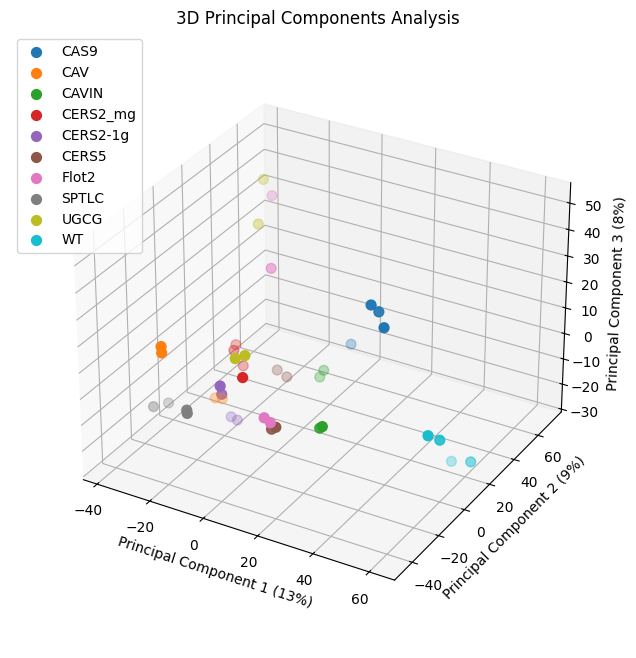

In [115]:
i = 0
fig = plt.figure(figsize=(8,8))
ax_nstd = fig.add_subplot(projection='3d')
ax_nstd.set_box_aspect(aspect=None, zoom=0.9)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for protein in df_pca['Mutation'].unique():
    x = df_pca[df_pca['Mutation'] == protein]['principal component 1']
    y = df_pca[df_pca['Mutation'] == protein]['principal component 2']
    z = df_pca[df_pca['Mutation'] == protein]['principal component 3']
    
    ax_nstd.scatter(x, y, z, color=colors[i], label=protein, s=50)
#     confidence_ellipse(x, y, ax_nstd, n_std=3,
#                    label=protein, alpha=0.5, facecolor=colors[i], edgecolor=colors[i], linestyle=':')
    i += 1


ax_nstd.grid()
ax_nstd.legend(loc='upper left')
ax_nstd.set_title('3D Principal Components Analysis')
ax_nstd.set_xlabel('Principal Component 1 (13%)')
ax_nstd.set_ylabel('Principal Component 2 (9%)')
ax_nstd.set_zlabel('Principal Component 3 (8%)')
plt.show()
ax_nstd.figure.savefig('graphs/pos_mode_whole_dataset/pca_3d.jpg', dpi=300)

# Biplot

In [116]:
# bring in df_meta to be able to condense loadings data
df_meta = pd.read_csv('dataframes/pos_lipids_df_meta2.csv')
#df_meta.head()

# which lipids contribute most to each pc
loadings = pd.DataFrame(pca_lipids.components_, columns=samples, index=pcs) # how does each lipid contribute to each component? all factors add to 1
# loadings[:2]

ld = loadings[:2].T.merge(df_meta[['Sample Name', 'Head Group 2']], on='Sample Name') # merge on df_meta to be able to sort by lipid feature
ld = ld.drop(['Sample Name'], axis=1).groupby('Head Group 2').sum() # drop 'Sample Name' column to be able to convert to array and then groupby lipid feature (head group)
hg = ld.T.columns # get head group names for each point (x=pc1, y=pc2)
ldngs = np.array(ld.T) #convert to array for graphing

In [117]:
ld

,principal component 1,principal component 2
Head Group 2,,
"DAG,TAG,MAG",4.235724,-0.525344
DMPE,0.203187,-0.130241
GD,-0.474238,1.192847
GM,-0.977609,2.089490
GT,0.413447,0.157522
Hex_Cer,-0.801991,2.345978
LDMPE,-0.124961,0.029715
LMMPE,-0.013652,-0.036628
LPC,-0.130100,-0.166934


In [118]:
loadings

Sample Name,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-H2O),Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),Hex2Cer 26:0;2 (LCB 18:0;2-H2O),Hex2Cer 26:4;3 (LCB 18:0;2-H2O),"Hex2Cer 26:4;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)","Hex2Cer 26:3;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)","Hex2Cer 26:3;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)",...,DAG 35:0+NH4 (-FA 17:0 (NH4)),DAG 38:4+NH4 (-FA 18:1 (NH4)),DAG 38:4+NH4 (-FA 20:3 (NH4)),DAG 38:4+NH4 (-FA 20:4 (NH4)),MADAG 38:2+NH4 (-FA 13:0 (NH4)),DAG 38:2+NH4 (-FA 16:1 (NH4)),MADAG 38:2+NH4 (-FA 16:2 (NH4)),DAG 38:2+NH4 (-FA 18:0 (NH4)),DAG 38:2+NH4 (-FA 18:1 (NH4)),MADAG 38:2+NH4 (-FA 18:2 (NH4))
principal component 1,0.011747,0.011018,-0.005854,0.002110,0.017087,0.007721,-0.004354,-0.012479,-0.007670,-0.003822,...,-0.013449,-0.008305,-0.008114,-0.007503,0.002716,0.003765,-0.004737,0.013099,0.015109,0.004195
principal component 2,0.012389,0.001076,0.001463,-0.013529,-0.010592,-0.014119,-0.010575,0.020857,0.019614,0.007620,...,0.006618,-0.017730,-0.019590,-0.019784,-0.010165,-0.008495,0.003970,0.001816,0.005163,-0.000204
principal component 3,-0.029069,0.029060,-0.029383,-0.000782,0.022891,0.018926,0.026296,0.011073,0.018221,0.002340,...,0.017655,0.001791,0.005034,0.006319,-0.002119,0.000768,0.007073,-0.007178,-0.009462,-0.000875
principal component 4,-0.004674,0.008521,-0.010993,-0.026069,0.014012,-0.007291,-0.010423,0.012810,0.009538,0.003567,...,-0.013614,-0.022006,-0.025190,-0.028551,-0.030245,-0.038094,-0.002728,-0.031535,-0.027106,-0.026016
principal component 5,0.024524,0.006522,0.007784,0.010638,-0.013867,-0.007380,-0.009088,-0.003907,0.013391,0.017024,...,-0.004541,0.009696,0.006809,0.006548,-0.000494,-0.005608,-0.006934,-0.012663,-0.015134,-0.007832
principal component 6,0.009795,-0.003585,0.018225,0.012880,-0.010876,-0.010847,-0.013292,0.002368,0.012767,-0.003052,...,0.030169,0.022897,0.030408,0.022238,0.002632,0.008286,0.013794,0.004350,0.006715,0.025378
principal component 7,-0.001947,0.015562,0.014835,0.010996,0.008150,0.011564,-0.000162,-0.007756,0.007193,0.012291,...,0.018452,0.009211,0.006571,-0.001235,-0.008329,-0.009499,0.029855,-0.008814,-0.007934,0.007917
principal component 8,-0.002061,-0.003495,-0.007968,-0.006914,0.009981,0.020111,0.001196,-0.013467,-0.000578,-0.004373,...,0.007806,0.008485,0.004852,0.001137,-0.001216,-0.001989,0.031409,-0.002739,-0.000460,0.006055
principal component 9,0.005645,-0.002300,-0.010220,-0.002768,-0.016132,-0.016028,-0.012998,-0.007047,-0.014053,-0.015200,...,-0.000482,0.000589,-0.001412,-0.004650,-0.004746,-0.011864,-0.008465,-0.010833,-0.010441,-0.007796
principal component 10,0.004899,-0.000447,-0.004978,0.005796,0.005086,-0.007390,0.011965,-0.002434,-0.002720,0.030140,...,-0.006569,-0.004040,-0.003930,-0.003501,-0.000276,0.007320,0.038099,0.007897,0.005497,0.013578


In [146]:
sum(loadings.iloc[0]**2)

1.0000000000000002

In [120]:
# get data for biplot
pc1 = principal_components[:,0] # get the values for principal component 1 (column 1 in df_pca)
pc2 = principal_components[:,1] # get the values for principal component 2 (column 2 in df_pca)
sample_ldngs = pca_lipids.components_ # which lipids (columns) contribute most to each pc (rows)?

In [121]:
# define scale factor for pc1 & pc2 to fit ldngs and PCs on the same plot
scale_pc1 = 1.0/(pc1.max() - pc2.min())
scale_pc2 = 1.0/(pc1.max() - pc2.min())

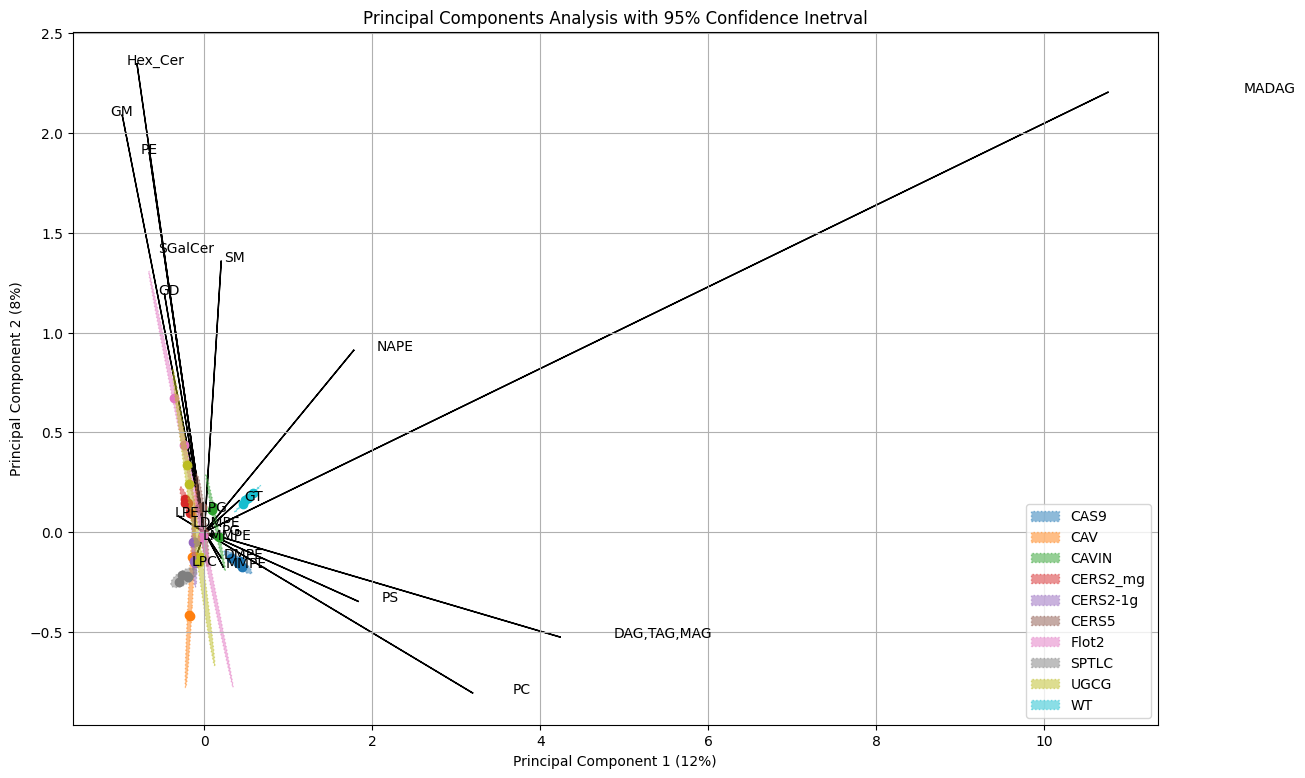

In [19]:
# create biplot
fig, ax_nstd = plt.subplots(figsize=(14,9))

# create arrows/vetors for each head group
for i, h in enumerate(hg):
    ax_nstd.arrow(0, 0, ldngs[0, i], ldngs[1, i]) # for each feature, plot arrow starting at (0,0) and ending at (pc1, pc2)
    ax_nstd.text(ldngs[0, i] * 1.15, ldngs[1, i], h, fontsize=10)


# overlay vector plot on 2D pca
i=0
for protein in df_pca['Mutation'].unique():
    x = df_pca[df_pca['Mutation'] == protein]['principal component 1'] * scale_pc1
    y = df_pca[df_pca['Mutation'] == protein]['principal component 2'] * scale_pc2
    
    ax_nstd.scatter(x, y, color=colors[i])
    confidence_ellipse(x, y, ax_nstd, n_std=3,
                   label=protein, alpha=0.5, facecolor=colors[i], edgecolor=colors[i], linestyle=':')
    i += 1


ax_nstd.grid()
ax_nstd.legend()
ax_nstd.set_title('Principal Components Analysis with 95% Confidence Inetrval')
ax_nstd.set_xlabel('Principal Component 1 ({:.0%})'.format(explained_variance[0]))
ax_nstd.set_ylabel('Principal Component 2 ({:.0%})'.format(explained_variance[1]))
plt.show()
ax_nstd.figure.savefig('graphs/pos_mode_whole_dataset/pca_confidence_ellipse.jpg', dpi=300)

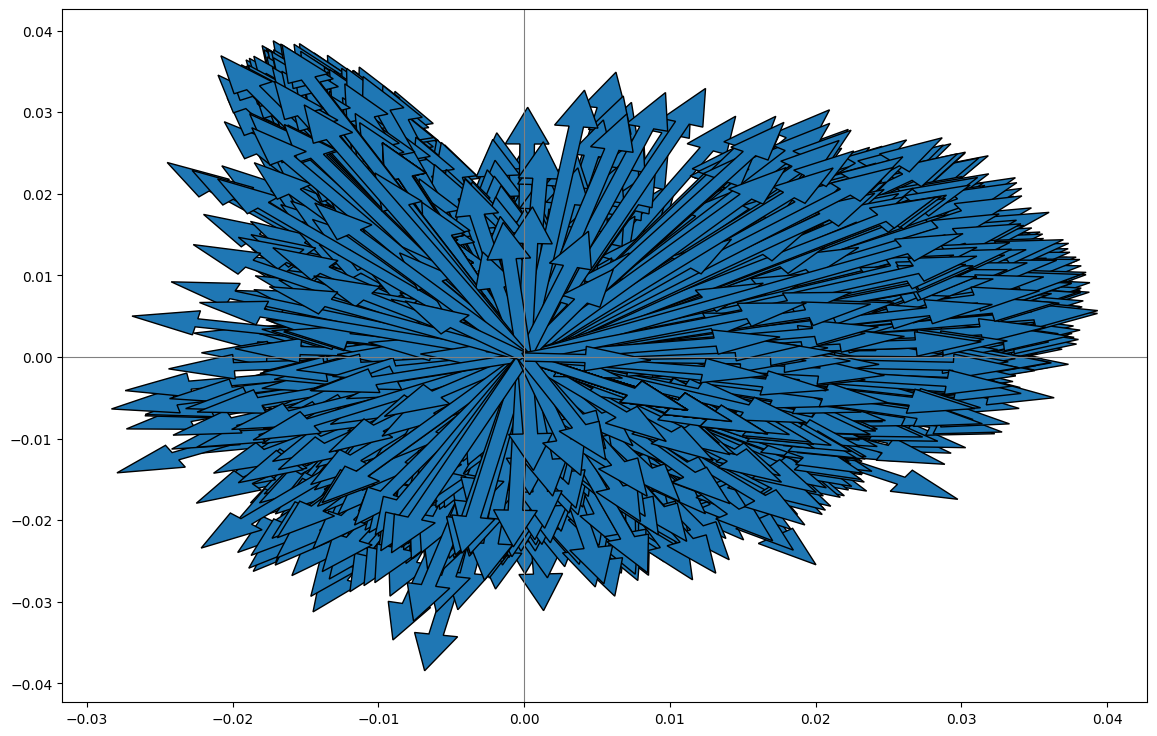

In [49]:
# create biplot
fig, ax_nstd = plt.subplots(figsize=(14,9))

# create vectors -- samples is the list of lipids
for i, s in enumerate(samples):
    ax_nstd.arrow(0, 0, sample_ldngs[0, i], sample_ldngs[1, i]) # for each lipid, plot arrow starting at (0,0) and ending at (pc1, pc2)
    #ax_nstd.text(sample_ldngs[0, i] * 1.15, sample_ldngs[1, i], s, fontsize=10)
    
# Add a vertical line at x=0
ax_nstd.axvline(x=0, color='gray', linewidth=0.8)

# Add a horizontal line at y=0
ax_nstd.axhline(y=0, color='gray', linewidth=0.8)

# # overlay vectors on 2D pca
# i=0
# for protein in df_pca['Mutation'].unique():
#     x = df_pca[df_pca['Mutation'] == protein]['principal component 1'] * scale_pc1
#     y = df_pca[df_pca['Mutation'] == protein]['principal component 2'] * scale_pc2
    
#     ax_nstd.scatter(x, y, color=colors[i])
#     confidence_ellipse(x, y, ax_nstd, n_std=3,
#                    label=protein, alpha=0.5, facecolor=colors[i], edgecolor=colors[i], linestyle=':')
#     i += 1


# ax_nstd.grid()
# ax_nstd.legend()
# ax_nstd.set_title('Principal Components Analysis with 95% Confidence Inetrval')
# ax_nstd.set_xlabel('Principal Component 1 ({:.0%})'.format(explained_variance[0]))
# ax_nstd.set_ylabel('Principal Component 2 ({:.0%})'.format(explained_variance[1]))
# plt.show()
# ax_nstd.figure.savefig('graphs/pos_mode_whole_dataset/pca_confidence_ellipse.jpg', dpi=300)

In [82]:
# attempt biplot in altair

#create df for altair
bd = loadings[:2].T.reset_index()
bd['x1'] = 0
bd['y1'] = 0
bd = bd.merge(df_meta[['Sample Name', 'Head Group 2']], on='Sample Name')

# create chart
click = alt.selection_point(fields=['Head Group 2'], bind='legend')

biplot = alt.Chart(bd[:5000]).mark_rule().encode(
    x = 'principal component 1:Q',
    y = 'principal component 2:Q',
    x2 = 'x1',
    y2 = 'y1',
    color = alt.condition(click, 'Head Group 2:N', alt.value('lightgray')),
    opacity = alt.condition(click, alt.value(1.0), alt.value(0)),
    tooltip = ['Sample Name', 'Head Group 2']
).add_params(
    click
).properties(
    width=400,
    height=500,
    title='Principal Components Analysis'
)

biplot

alt.Chart(...)

In [84]:
# attempt biplot in altair

#create df for altair
bd = loadings[:2].T.reset_index()
bd['x1'] = 0
bd['y1'] = 0
bd = bd.merge(df_meta[['Sample Name', 'Acyl Chain Length']], on='Sample Name')

# create chart
click = alt.selection_point(fields=['Acyl Chain Length'], bind='legend')

biplot = alt.Chart(bd[:5000]).mark_rule().encode(
    x = 'principal component 1:Q',
    y = 'principal component 2:Q',
    x2 = 'x1',
    y2 = 'y1',
    color = alt.condition(click, 'Acyl Chain Length:N', alt.value('lightgray')),
    opacity = alt.condition(click, alt.value(1.0), alt.value(0)),
    tooltip = ['Sample Name', 'Acyl Chain Length']
).add_params(
    click
).properties(
    width=400,
    height=500,
    title='Principal Components Analysis'
)

biplot

alt.Chart(...)

In [ ]:
click = alt.selection_point(fields=['Mutation'])

pca= alt.Chart(df_pca).mark_point().encode(
    x='principal component 1:Q',
    y='principal component 2:Q',
    color=alt.condition(click, 'Mutation:N', alt.value('lightgray')),
    tooltip=['Exp', 'Mutation']
).properties(
    width=400,
    height=500,
    title='Principal Components Analysis'
).add_params(
    click
)

pca

# Save Chart

In [21]:
# save chart to html
# pca.save('graphs/pos_mode_whole_dataset/pca-transposed.html')